In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
Presidents = ["Donald Trump","Barack Obama","George W. Bush", "William J. Clinton",
            "George Bush", "Ronald Reagan", "Jimmy Carter", "Gerald R. Ford", "Richard Nixon"]
filepath = "../Data/Cleaned President Ratings/"
Approval_Ratings = pd.DataFrame()
for i in range(len(Presidents)):
   Approval_Rating = pd.read_csv(f"{filepath}{Presidents[i]}-Ratings.csv")
   Approval_Ratings = pd.concat([Approval_Ratings,Approval_Rating],ignore_index = True)

FileNotFoundError: [Errno 2] File b'../Data/Cleaned President Ratings/Donald Trump-Ratings.csv' does not exist: b'../Data/Cleaned President Ratings/Donald Trump-Ratings.csv'

In [2]:
#File Name stored as Crime_file
crime_file = "Resources\Crime_in_USA_1960-2018.csv"
crime_df = pd.read_csv(crime_file,encoding="ISO-8859-1")
crime_df.columns = ["Year","Population","Total", "Violent","Property",
                    "Murder","Forcible_Rape","Robbery","Aggravated_Assault",
                    "Burglary","Larceny_Theft","Vehicle_Theft"]
crime_df.head()


,Year,Population,Total,Violent,Property,Murder,Forcible rape,Robbery,Aggravated assault,Burglary,Larceny theft,Vehicle theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_Assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [4]:
crime_df.Population = crime_df.Population.astype(int)
crime_df["Year"] = [crime_df["Year"][i].strip('\xa0') for i in range(len(crime_df["Year"]))]
crime_df["Population"] = crime_df["Population"]/1000
year_population = crime_df[["Year","Population"]]

In [5]:
crime_df.Year = crime_df.Year.astype(int)
pop_max =  year_population["Population"].max()
population_list = np.linspace(year_population["Population"].min(),year_population["Population"].max(),num = 10,dtype = int)
pop_min = year_population["Population"].min()

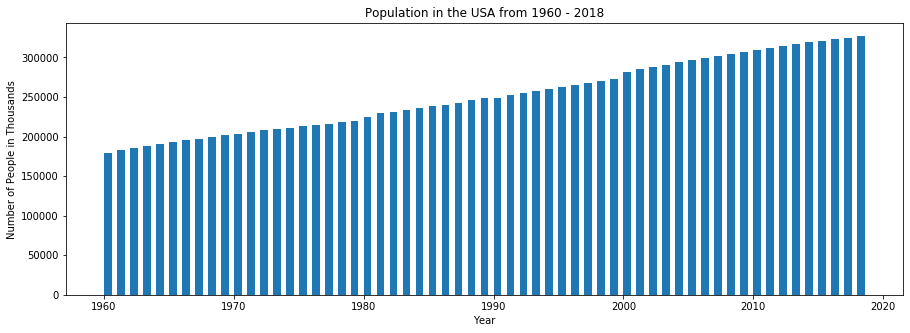

In [6]:
plt.figure(figsize=(15, 5));
plt.bar(crime_df["Year"],crime_df["Population"],align = 'edge', width = 0.6);
plt.title("Population in the USA from 1960 - 2018");
plt.xlabel("Year");
plt.ylabel("Number of People in Thousands");

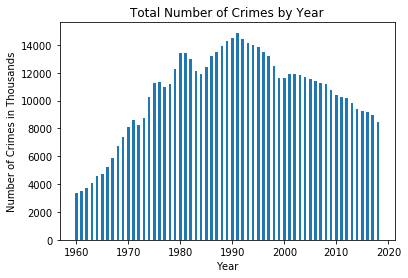

In [7]:
crime_df.Total = crime_df.Total.astype(int)
plt.bar(crime_df["Year"],crime_df["Total"]/1000, align = "center", width = 0.5);
plt.xlabel("Year")
plt.ylabel("Number of Crimes in Thousands")
plt.title("Total Number of Crimes by Year");

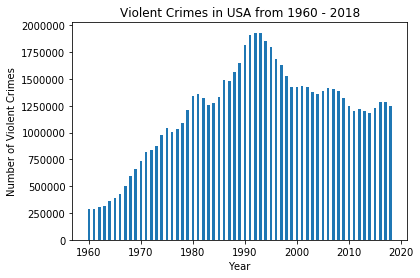

In [18]:
crime_df.Violent = crime_df.Violent.astype(int);
plt.bar(crime_df["Year"],crime_df["Violent"], align = "center", width = 0.5);
plt.xlabel("Year")
plt.ylabel("Number of Violent Crimes");
plt.title("Violent Crimes in USA from 1960 - 2018");

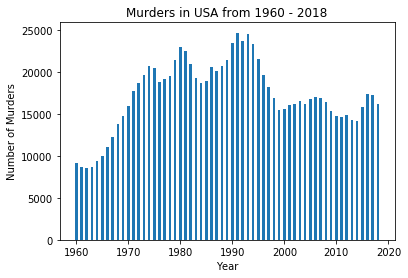

In [16]:
crime_df.Murder = crime_df.Murder.astype(int);
plt.bar(crime_df["Year"],crime_df["Murder"], align = "center", width = 0.5);
plt.xlabel("Year")
plt.ylabel("Number of Murders");
plt.title("Murders in USA from 1960 - 2018");

In [9]:
crime_df.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_Assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323.175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992.000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771.000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483.000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141.000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


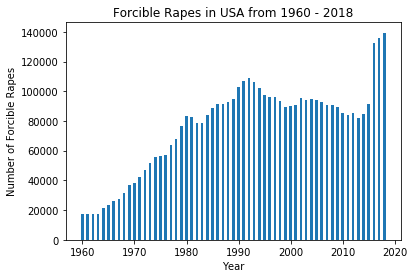

In [15]:
crime_df.Forcible_Rape = crime_df.Forcible_Rape.astype(int);
plt.bar(crime_df["Year"],crime_df["Forcible_Rape"], align = "center", width = 0.5);
plt.xlabel("Year")
plt.ylabel("Number of Forcible Rapes");
plt.title("Forcible Rapes in USA from 1960 - 2018");